In [6]:
%matplotlib qt

QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700


In [1]:
#load data
import mne
import pandas as pd
import numpy as np
import os

In [2]:
subject = "fsaverage"
subjects_dir = '/home/pablo/works/dev_thesis_SEEG/mne_data/MNE-sample-data/subjects'


In [3]:
data_path = "/home/pablo/works/dev_thesis_SEEG/New_data/ds004100-download/"
subject_path = "sub-HUP142/ses-presurgery/ieeg/"
subject_file = "sub-HUP142_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf"
channels_file = "sub-HUP142_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv"
mni2fsavg_file = "/home/pablo/works/dev_thesis_SEEG/New_data/Code/mni2fsaverage.npy"

In [4]:
raw = mne.io.read_raw_edf(data_path + subject_path + subject_file, preload=True)

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/New_data/ds004100-download/sub-HUP142/ses-presurgery/ieeg/sub-HUP142_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132607  =      0.000 ...   258.998 secs...


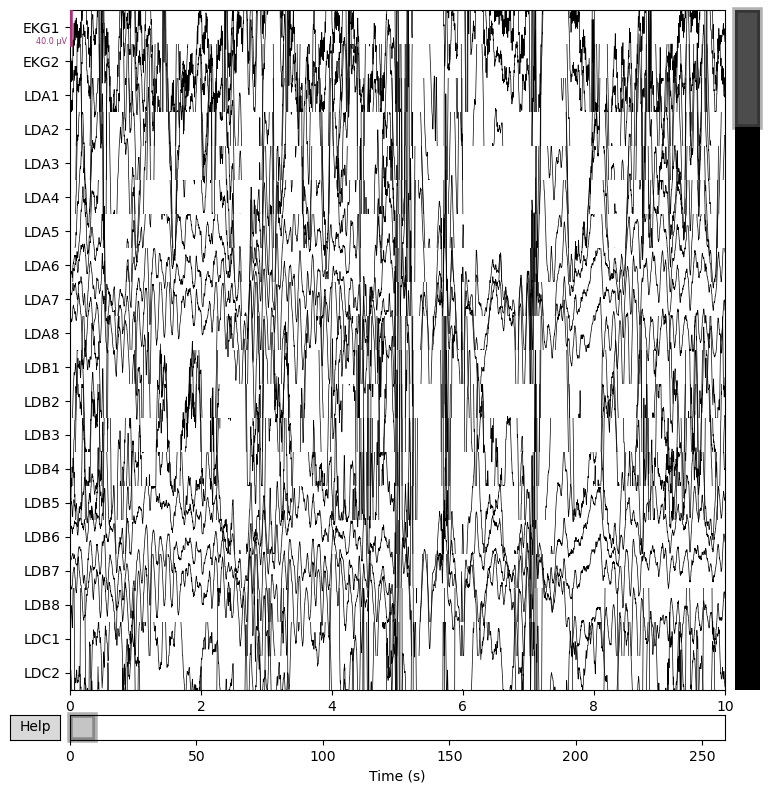

Channels marked as bad:
none


: 

In [ ]:
raw.plot()

In [5]:
#Digit montahe
# Load the file
electrode_positions = pd.read_csv(data_path + subject_path + channels_file, sep='\t')

# Load the array back
mni2fsavg = np.load(mni2fsavg_file)

# Filter out rows with NaN in the coordinate columns (x, y, z)
valid_electrodes = electrode_positions.dropna(subset=['x', 'y', 'z'])

# Prepare the dictionary for digitized montage
ch_pos = {}
for _, row in valid_electrodes.iterrows():
    # Original coordinates (in meters)
    original_point = np.array([row['x'], row['y'], row['z'], 1])  # Homogeneous
    
    # Transform the point
    transformed_point = mni2fsavg @ original_point
    transformed_point = transformed_point/1000
    # Drop the homogeneous coordinate (last element)
    ch_pos[row['name']] = transformed_point[:3]

# Create the digitized montage

# # Ideally the nasion/LPA/RPA will also be present from the digitization, here
lpa, nasion, rpa = mne.coreg.get_mni_fiducials(
    subject, subjects_dir)
lpa, nasion, rpa = lpa['r'], nasion['r'], rpa['r']

montage = mne.channels.make_dig_montage(
    ch_pos, coord_frame='mni_tal', nasion=nasion, lpa=lpa, rpa=rpa)

# Display the montage summary
print(montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 114 channels>


In [6]:
ch_pos

{'LDA1': array([-0.01186847, -0.00501581, -0.02047209]),
 'LDA2': array([-0.01708426, -0.00609591, -0.02026975]),
 'LDA3': array([-0.02242582, -0.00647396, -0.01967341]),
 'LDA4': array([-0.02742974, -0.00823229, -0.02110781]),
 'LDA5': array([-0.03355081, -0.00836192, -0.02232947]),
 'LDA6': array([-0.0398109 , -0.01060758, -0.02450959]),
 'LDA7': array([-0.04291915, -0.00961707, -0.02244006]),
 'LDA8': array([-0.04764053, -0.00973519, -0.02410849]),
 'LDB1': array([-0.01314802, -0.00959603, -0.01774978]),
 'LDB2': array([-0.01801107, -0.01212598, -0.01657572]),
 'LDB3': array([-0.0243449 , -0.0133083 , -0.01799689]),
 'LDB4': array([-0.029364  , -0.01543437, -0.0190077 ]),
 'LDB5': array([-0.03494459, -0.01609236, -0.02128178]),
 'LDB6': array([-0.04036837, -0.01613711, -0.02286217]),
 'LDB7': array([-0.04324617, -0.01416227, -0.02089034]),
 'LDB8': array([-0.04786217, -0.01620319, -0.02378201]),
 'LDC1': array([-0.02520659, -0.02744812, -0.01291803]),
 'LDC2': array([-0.03008275, -0

In [7]:
# for fsaverage, "mri" and "mni_tal" are equivalent and, since
# we want to plot in fsaverage "mri" space, we need use an identity
# transform to equate these coordinate frames
montage.apply_trans(mne.transforms.Transform(fro="mni_tal", to="mri", trans=np.eye(4)))

In [8]:
# attach montage
raw.set_montage(montage, on_missing='ignore')

Measurement date,"August 28, 2022 22:43:18 GMT"
Experimenter,Unknown
Participant,X
Digitized points,117 points
Good channels,116 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [9]:
trans = mne.channels.compute_native_head_t(montage)
view_kwargs = dict(azimuth=105, elevation=100, focalpoint=(0, 0, -15))
brain = mne.viz.Brain(
    subjects_dir+"/"+subject,
    alpha=0.25,
    background="white",
)
brain.add_sensors(raw.info, trans=trans)
brain.add_head(alpha=0.25, color="tan")
brain.show_view(distance=400, **view_kwargs)

Using pyvistaqt 3d backend.



QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700


: 

In [17]:
brain = mne.viz.Brain(
    "fsaverage", subjects_dir=subjects_dir, surf="inflated", background="black"
)
brain.add_annotation("aparc.a2009s")
brain.add_sensors(raw.info, trans=trans)
brain.show_view(distance=500, **view_kwargs)

Channel types::	eeg: 59


In [18]:
brain = mne.viz.Brain(
    "fsaverage", subjects_dir=subjects_dir, surf="flat", background="black"
)
brain.add_annotation("aparc.a2009s")
brain.add_sensors(raw.info, trans=trans)

Channel types::	eeg: 59


Electrodes in the dataset: {'RA', 'RAFb', 'RAFd', 'RH', 'RAFc', 'RPFa', 'RAFa', 'LAF', 'RPFb', 'RPFc'}
['LAF1', 'LAF2', 'LAF3', 'LAF4']


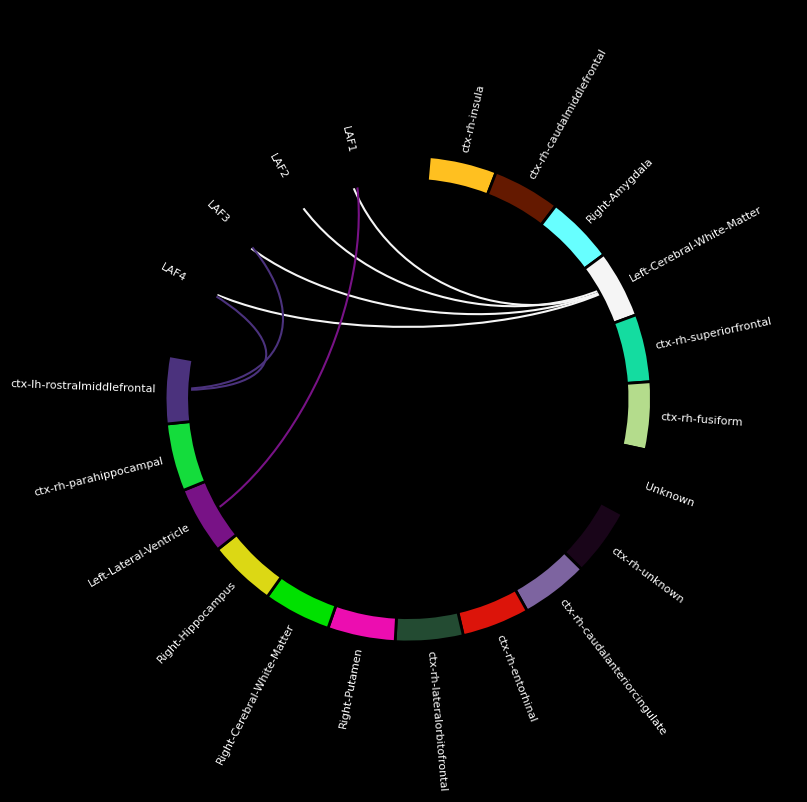

['RA1', 'RA2', 'RA3', 'RA4', 'RAFa1', 'RAFa2', 'RAFa3', 'RAFa4', 'RAFb1', 'RAFb2', 'RAFb3', 'RAFb4', 'RAFc1', 'RAFc2', 'RAFc3', 'RAFc4', 'RAFd1', 'RAFd2', 'RAFd3', 'RAFd4']


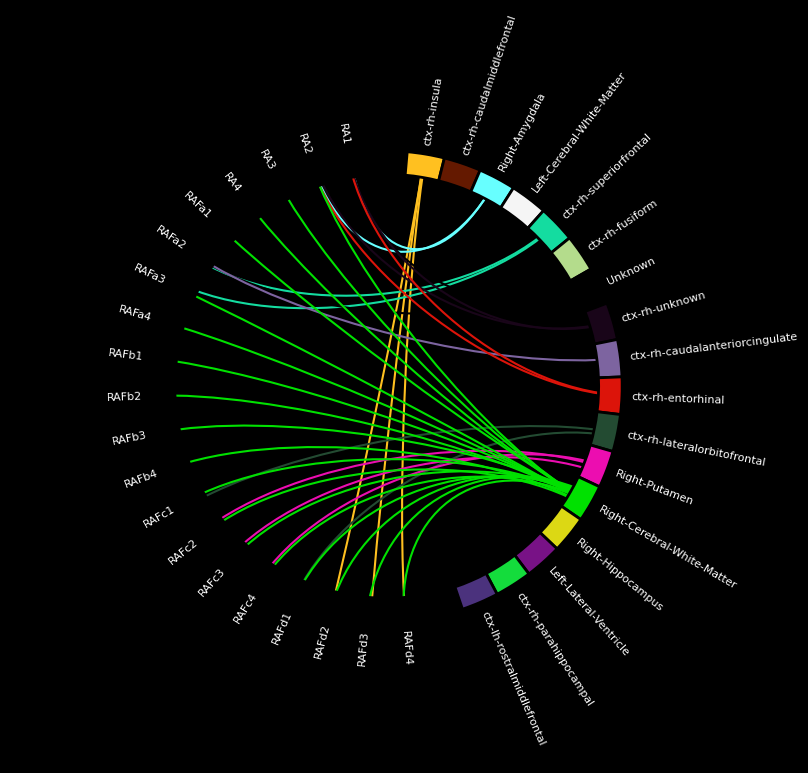

In [20]:
aseg = "aparc+aseg"  # parcellation/anatomical segmentation atlas
labels, colors = mne.get_montage_volume_labels(
    montage, "fsaverage", subjects_dir=subjects_dir, aseg=aseg
)

# separate by electrodes which have names like LAMY 1
electrodes = set(
    [
        "".join([lttr for lttr in ch_name if not lttr.isdigit() and lttr != " "])
        for ch_name in montage.ch_names
    ]
)
print(f"Electrodes in the dataset: {electrodes}")

electrodes = ("LAF", "RA")  # choose two for this example
for elec in electrodes:
    picks = [ch_name for ch_name in raw.ch_names if elec in ch_name]
    print(picks)
    fig, ax = mne.viz.plot_channel_labels_circle(labels, colors, picks=picks)
    fig.text(0.3, 0.9, "Anatomical Labels", color="white")

In [21]:
picks = [
    ii
    for ii, ch_name in enumerate(raw.ch_names)
    if any([elec in ch_name for elec in electrodes])
]
labels = (
    "ctx-lh-caudalmiddlefrontal",
    "ctx-lh-precentral",
    "ctx-lh-superiorfrontal",
    "Left-Putamen",
)

fig = mne.viz.plot_alignment(
    mne.pick_info(raw.info, picks),
    trans,
    "fsaverage",
    subjects_dir=subjects_dir,
    surfaces=[],
    coord_frame="mri",
)

brain = mne.viz.Brain(
    "fsaverage",
    alpha=0.1,
    cortex="low_contrast",
    subjects_dir=subjects_dir,
    units="m",
    figure=fig,
)
brain.add_volume_labels(aseg="aparc+aseg", labels=labels)
brain.show_view(azimuth=120, elevation=90, distance=0.25)

Channel types::	eeg: 24
    Smoothing by a factor of 0.9


In [22]:
duration = raw.times[-1]  # or raw.times.size / raw.info['sfreq']
print(f"Duration of the recording: {duration:.2f} seconds")

Duration of the recording: 320.00 seconds


In [37]:
# Define the center and crop interval
center_time = 120  # Center of the 1800-second duration
tmin = center_time - 30  # Start 30 seconds before the center
tmax = center_time + 30  # End 30 seconds after the center

# Crop the raw data
raw_cropped = raw.copy().crop(tmin=tmin, tmax=tmax)

In [38]:
# Create a dictionary mapping each channel to 'seeg'
new_channel_types = {ch_name: 'seeg' for ch_name in raw_cropped.ch_names}

# Apply the channel type change
raw_cropped.set_channel_types(new_channel_types)

# Verify the changes
print("All channels set to sEEG:", raw_cropped.get_channel_types())

All channels set to sEEG: ['seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg', 'seeg']


In [39]:
# Step 2: Define events and create epochs
# Assuming a generic event creation for the entire time window
event_id = {'event': 1}  # Arbitrary event name
events = mne.make_fixed_length_events(raw_cropped, id=1, duration=60)  # 1-second duration events

# Create epochs with baseline correction if necessary
epochs = mne.Epochs(raw_cropped, events, event_id, tmin=0, tmax=1.0, baseline=(0, 0))

# Step 3: Average the epochs to get an Evoked object
evoked = epochs.average()

Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [40]:
# get standard fsaverage volume (5mm grid) source space
fname_src = subjects_dir + "/fsaverage/bem/fsaverage-vol-5-src.fif"
vol_src = mne.read_source_spaces(fname_src)

stc = mne.stc_near_sensors(
    evoked,
    trans,
    "fsaverage",
    subjects_dir=subjects_dir,
    src=vol_src,
    surface=None,
    verbose="error",
)
stc = abs(stc)  # just look at magnitude
clim = dict(kind="value", lims=np.percentile(abs(evoked.data), [10, 50, 75]))

    Reading a source space...
    [done]
    1 source spaces read


In [41]:
brain = stc.plot_3d(
    src=vol_src,
    subjects_dir=subjects_dir,
    view_layout="horizontal",
    views=["axial", "coronal", "sagittal"],
    size=(800, 300),
    show_traces=0.4,
    clim=clim,
    add_data_kwargs=dict(colorbar_kwargs=dict(label_font_size=8)),
)
